In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
output_file_name = "subte.xlsx"
output_sheet_name = "subte"

In [3]:
df_subte_2020 = pd.read_csv('subte_2020.csv')

In [4]:
df_subte_2020 = df_subte_2020[df_subte_2020['FECHA'].notna()]

In [5]:
df_subte_2020["AÑO"] = pd.DatetimeIndex(df_subte_2020['FECHA']).year

In [6]:
df_subte_2020["MES"] = pd.DatetimeIndex(df_subte_2020['FECHA']).month

In [7]:
MESES = { 1 : '01', 2 : '02', 3 : '03', 4 : '04', 5 : '05', 6 : '06', 7 : '07', 8 : '08', 9 : '09', 10 : '10', 11 : '11', 12 : '12'}

In [8]:
df_subte_2020['MES'] = df_subte_2020['MES'].map(MESES)

In [9]:
df_subte_2020['AÑO_MES'] = df_subte_2020['AÑO'].astype(str) + df_subte_2020['MES'].astype(str)

In [10]:
df_subte_2020['TIPO'] = 'SUBTE'

In [11]:
df = df_subte_2020.groupby(['AÑO_MES','TIPO'],as_index=False).sum()[['AÑO_MES','TIPO','pax_TOTAL']].rename({'pax_TOTAL':'TOTAL'},axis=1)
df

,AÑO_MES,TIPO,TOTAL
0,202001,SUBTE,14431260.0
1,202002,SUBTE,14379523.0
2,202003,SUBTE,16665570.0
3,202004,SUBTE,2532868.0
4,202005,SUBTE,2769479.0
5,202006,SUBTE,3566230.0
6,202007,SUBTE,3417198.0
7,202008,SUBTE,3122951.0
8,202009,SUBTE,3629713.0
9,202010,SUBTE,4966696.0


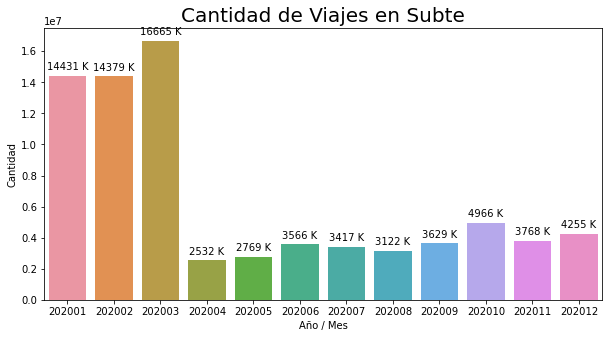

In [15]:
plt.figure(figsize=(10,5))
s = sns.barplot(data = df,
            x = 'AÑO_MES',
            y = 'TOTAL')
for p in s.patches:
    s.annotate(str(int(p.get_height()/1000)) + ' K', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title("Cantidad de Viajes en Subte", fontsize = 20)
plt.xlabel('Año / Mes')
plt.ylabel('Cantidad')
plt.show()

In [12]:
writer = pd.ExcelWriter(output_file_name, engine='xlsxwriter')

df.to_excel(writer, index=False, sheet_name=output_sheet_name)

workbook  = writer.book
worksheet = writer.sheets[output_sheet_name]

format = workbook.add_format()
format.set_align('center')
format.set_align('vcenter')

worksheet.set_column('A:C', 30, format)

writer.save()